In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from keras.layers import LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
dataset = pd.read_csv('ETH-USD_data.csv')
training_set = dataset.drop(['Date'],axis=1)

In [3]:
training_set

,Open,High,Low,Close,Volume
0,2639.447021,2741.368408,2587.412842,2590.359619,13382637240
1,2572.898682,2648.916748,2510.678711,2639.299316,16360200507
2,2627.665527,2752.458496,2568.254395,2573.816162,18646392740
3,2763.756592,2763.756592,2585.946289,2628.648438,11641437834
4,2784.872803,2826.347900,2707.378418,2763.701172,9774183169
...,...,...,...,...,...
1563,307.024994,328.415009,307.024994,316.716003,1041889984
1564,314.690002,319.153015,298.513000,307.907990,1613479936
1565,298.585999,319.453003,298.191986,314.681000,842300992
1566,320.670990,324.717987,294.541992,299.252991,885985984


In [4]:
data = training_set[['Open', 'High', 'Low', 'Close']].values

In [5]:
# X is Past 60 days of stocks (Highs, lows, close and open values)
# Y is The predicted value for the next day
lookback = 60
X, y = [], []

for h in range(len(data) - lookback):
    X.append(data[h:h+lookback])
    y.append(data[h+lookback])

In [6]:
X = np.array(X)
y = np.array(y)

In [7]:
X[0] 

array([[2639.447021, 2741.368408, 2587.412842, 2590.359619],
       [2572.898682, 2648.916748, 2510.678711, 2639.299316],
       [2627.665527, 2752.458496, 2568.254395, 2573.816162],
       [2763.756592, 2763.756592, 2585.946289, 2628.648438],
       [2784.872803, 2826.3479  , 2707.378418, 2763.701172],
       [2884.340576, 2937.308594, 2761.643311, 2785.727539],
       [3126.858398, 3154.615234, 2861.852051, 2881.481934],
       [3180.446777, 3181.616943, 3055.168213, 3127.830078],
       [2933.729004, 3185.520752, 2917.857178, 3179.877197],
       [2880.187744, 2957.963623, 2840.257568, 2933.479004],
       [2916.789551, 2947.776611, 2845.397705, 2883.463379],
       [2927.386475, 2980.079346, 2870.177002, 2917.362793],
       [3077.413086, 3127.450684, 2888.707764, 2927.383545],
       [3240.113037, 3271.316162, 3070.378174, 3077.482178],
       [3121.182617, 3263.155762, 3063.160156, 3239.457031],
       [3143.008545, 3219.472656, 3038.37793 , 3122.608643],
       [3057.422119, 318

In [8]:
y[0] 

array([4049.781982, 4138.564941, 4027.927002, 4093.281006])

In [9]:
X.shape # To find the right input shape

(1508, 60, 4)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [12]:
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [13]:
X_train

array([[[0.54068557, 0.55260626, 0.54033871, 0.53006946],
        [0.52660363, 0.533371  , 0.52378409, 0.54042098],
        [0.53819255, 0.55491364, 0.53620547, 0.52657026],
        ...,
        [0.8365283 , 0.82228419, 0.79531473, 0.78611642],
        [0.84228569, 0.84068966, 0.85231591, 0.83617259],
        [0.84850799, 0.83632513, 0.84790057, 0.84247164]],

       [[0.52660363, 0.533371  , 0.52378409, 0.54042098],
        [0.53819255, 0.55491364, 0.53620547, 0.52657026],
        [0.56699007, 0.5572643 , 0.54002232, 0.53816815],
        ...,
        [0.84228569, 0.84068966, 0.85231591, 0.83617259],
        [0.84850799, 0.83632513, 0.84790057, 0.84247164],
        [0.83911916, 0.84330359, 0.85111523, 0.84796109]],

       [[0.53819255, 0.55491364, 0.53620547, 0.52657026],
        [0.56699007, 0.5572643 , 0.54002232, 0.53816815],
        [0.57145836, 0.57028689, 0.56622008, 0.56673394],
        ...,
        [0.84850799, 0.83632513, 0.84790057, 0.84247164],
        [0.83911916, 0.843303

In [14]:
X_test

array([[[0.02598936, 0.02610629, 0.02669634, 0.02639351],
        [0.0245204 , 0.02620054, 0.02505952, 0.02605403],
        [0.02464356, 0.02400927, 0.0251758 , 0.02450997],
        ...,
        [0.02414522, 0.02545028, 0.02275542, 0.02382   ],
        [0.02827723, 0.02809282, 0.02382398, 0.02403723],
        [0.03073672, 0.03090763, 0.02896204, 0.02810933]],

       [[0.0245204 , 0.02620054, 0.02505952, 0.02605403],
        [0.02464356, 0.02400927, 0.0251758 , 0.02450997],
        [0.02427155, 0.02411934, 0.02500968, 0.02460494],
        ...,
        [0.02827723, 0.02809282, 0.02382398, 0.02403723],
        [0.03073672, 0.03090763, 0.02896204, 0.02810933],
        [0.03118383, 0.03046218, 0.02918814, 0.03086157]],

       [[0.02464356, 0.02400927, 0.0251758 , 0.02450997],
        [0.02427155, 0.02411934, 0.02500968, 0.02460494],
        [0.02396579, 0.02463636, 0.02470182, 0.02423203],
        ...,
        [0.03073672, 0.03090763, 0.02896204, 0.02810933],
        [0.03118383, 0.030462

In [15]:
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [16]:
y_train

array([[0.83911916, 0.84330359, 0.85111523, 0.84796109],
       [0.85214624, 0.84237597, 0.85136062, 0.83837982],
       [0.82476806, 0.84548027, 0.8229196 , 0.85107769],
       ...,
       [0.02414522, 0.02545028, 0.02275542, 0.02382   ],
       [0.02827723, 0.02809282, 0.02382398, 0.02403723],
       [0.03073672, 0.03090763, 0.02896204, 0.02810933]])

In [17]:
y_test

array([[0.03118383, 0.03046218, 0.02918814, 0.03086157],
       [0.0426945 , 0.04219829, 0.03225337, 0.03130914],
       [0.04338264, 0.04290922, 0.04345545, 0.04260239],
       ...,
       [0.04534823, 0.04870841, 0.04646222, 0.04872747],
       [0.05002152, 0.04980383, 0.04567477, 0.0454642 ],
       [0.04747676, 0.05078878, 0.04837454, 0.0500395 ]])

In [18]:
model = Sequential()

In [19]:
model.add(LSTM(50, return_sequences=True, input_shape=(60,4)))
model.add(Dropout(0.2))

In [20]:
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))

In [21]:
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

In [22]:
model.add(Dense(units = 4))

In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

In [24]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 3s 23ms/step - loss: 0.0185 - mae: 0.0729
Epoch 2/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0051 - mae: 0.0353
Epoch 3/100
38/38 [==============================] - 1s 24ms/step - loss: 0.0046 - mae: 0.0332
Epoch 4/100
38/38 [==============================] - 1s 24ms/step - loss: 0.0043 - mae: 0.0319
Epoch 5/100
38/38 [==============================] - 1s 24ms/step - loss: 0.0042 - mae: 0.0314
Epoch 6/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0035 - mae: 0.0287
Epoch 7/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0036 - mae: 0.0301
Epoch 8/100
38/38 [==============================] - 1s 24ms/step - loss: 0.0030 - mae: 0.0273
Epoch 9/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0029 - mae: 0.0277
Epoch 10/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0032 - mae: 0.0276
Epoch 11/100
38/38 [=============================

In [25]:
y_hat = model.predict(X_test)
y_hat = scaler.inverse_transform(y_hat)
y_hat

10/10 [==============================] - 1s 9ms/step


array([[194.87299, 204.12334, 191.51256, 201.5528 ],
       [206.25014, 215.94858, 201.91125, 212.83554],
       [224.1686 , 234.58743, 218.31573, 230.60788],
       ...,
       [294.9825 , 308.23248, 286.21292, 299.79465],
       [289.74884, 302.79263, 281.27972, 294.6568 ],
       [287.42288, 300.34802, 279.0038 , 292.3705 ]], dtype=float32)

In [26]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}, Test MAE: {test_mae}")

10/10 [==============================] - 1s 9ms/step - loss: 2.5202e-04 - mae: 0.0126
Test Loss (MSE): 0.0002520201669540256, Test MAE: 0.012552926316857338


In [27]:
train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
print(f"Train MAE: {train_mae:.6f}, Test MAE: {test_mae:.6f}")

Train MAE: 0.013520, Test MAE: 0.012553


In [28]:
y_test = scaler.inverse_transform(y_test)
y_test

array([[231.647995, 231.755005, 218.123001, 230.214996],
       [286.045013, 288.162994, 232.330994, 232.330994],
       [289.296997, 291.579987, 284.255005, 285.722992],
       ...,
       [298.585999, 319.453003, 298.191986, 314.681   ],
       [320.67099 , 324.717987, 294.541992, 299.252991],
       [308.644989, 329.451996, 307.056   , 320.884003]])

In [29]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_idx, val_idx in tscv.split(X_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]
    model.fit(X_tr, y_tr, epochs=10, verbose=0)
    val_mae = model.evaluate(X_val, y_val, verbose=0)[1]
    print(f"Val MAE: {val_mae:.6f}")

Val MAE: 0.022837
Val MAE: 0.013026
Val MAE: 0.003353
Val MAE: 0.004080
Val MAE: 0.003263


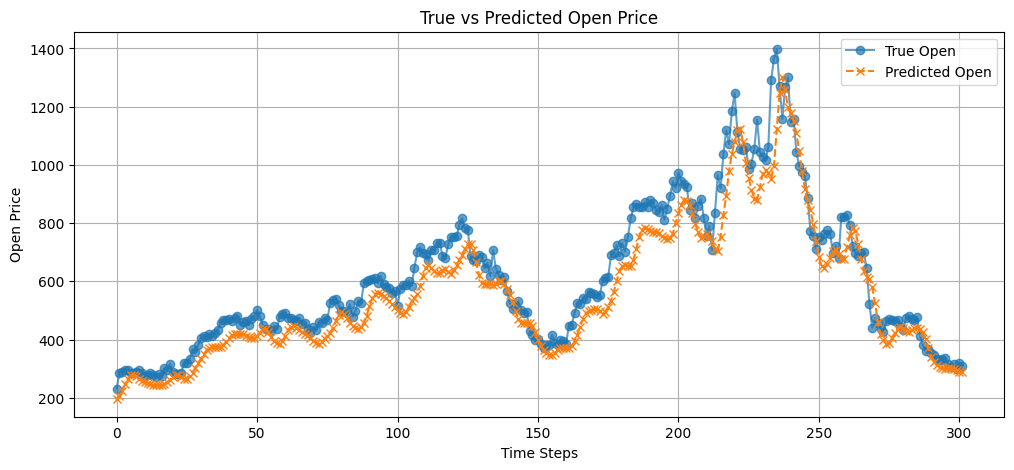

In [30]:
plt.figure(figsize=(12, 5))
plt.plot(y_test[:, 0], label='True Open', marker='o', alpha=0.7)
plt.plot(y_hat[:, 0], label='Predicted Open', linestyle='--', marker='x')
plt.xlabel('Time Steps')
plt.ylabel('Open Price')
plt.title('True vs Predicted Open Price')
plt.legend()
plt.grid(True)
plt.show()

10/10 [==============================] - 0s 9ms/step


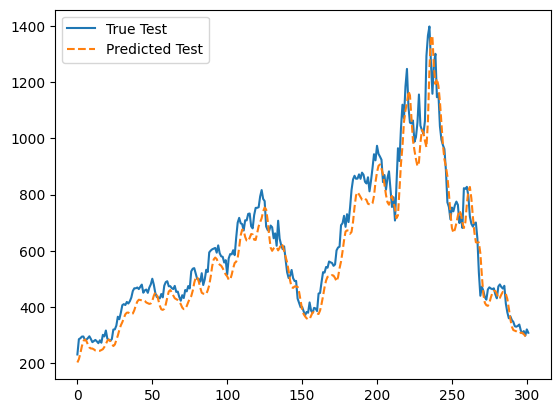

In [31]:
plt.plot(y_test[:, 0], label='True Test')
plt.plot(scaler.inverse_transform(model.predict(X_test))[:, 0], '--', label='Predicted Test')
plt.legend(); plt.show()

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11000     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 4)                 2